# HMEQ_Data
## Predict clients who default on their loan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [29]:
import pandas as pd

path = '/content/drive/MyDrive/Colab_Notebooks/Datasets/HMEQ_Data.csv'
ds = pd.read_csv(path)

ds.head()


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
# ds = pd.read_csv('./sample_data/HMEQ_Data.csv')

# 🔧 Data Preprocessing

## 🧹 Data Cleaning
(Missing values, duplicates, noise)

In [31]:
ds.info()
ds.describe()
ds.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


,0
BAD,0
LOAN,0
MORTDUE,518
VALUE,112
REASON,252
JOB,279
YOJ,515
DEROG,708
DELINQ,580
CLAGE,308


## Many row have Non elements, so drop this all row

In [32]:
df = ds[ds['VALUE'].isnull()]
df = ds[ds['MORTDUE'].isnull()]
df = df[df['JOB'].isnull()]
df = df[df['REASON'].isnull()]
df = df[df['DEROG'].isnull()]
df = df[df['DELINQ'].isnull()]
df = df.reset_index()
df = df['index']
df

,index
0,3
1,51
2,73
3,112
4,115
5,143
6,237
7,268
8,284
9,302


In [ ]:
ds = ds.drop(df)
ds = ds.reset_index()
ds = ds.drop(['index'], axis = 1)

In [ ]:
ds.info()

In [35]:
ds.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5908.000000,5908.000000,5442.000000,5804.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4648.000000
mean,0.201083,18668.009479,73760.817200,101885.727436,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.906381
std,0.400844,11218.407581,44457.609458,57493.700577,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.524966
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66087.250000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.291997
50%,0.000000,16400.000000,65019.000000,89445.000000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.911213
75%,0.000000,23325.000000,91488.000000,119789.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.061694
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


## Missing Value Handling

In [ ]:
# ds.corr()['BAD'].sort_values()

Groups MORTDUE

In [ ]:
ds['MORTDUE'].mean()

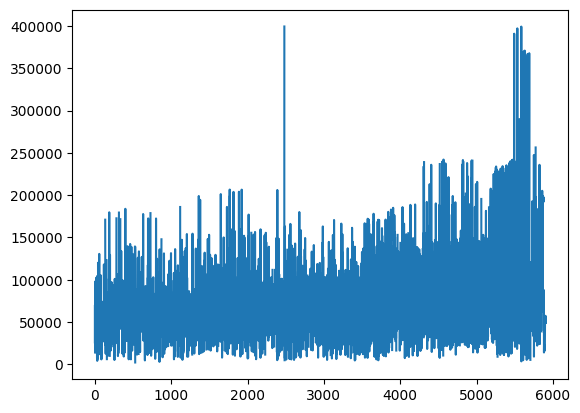

In [38]:
plt.plot(ds['MORTDUE'])

In [ ]:
ds['MORTDUE'] = ds['MORTDUE'].fillna(ds['MORTDUE'].mean())

(array([1.095e+03, 3.032e+03, 1.115e+03, 4.390e+02, 1.200e+02, 8.300e+01,
        9.000e+00, 1.000e+00, 1.000e+00, 1.300e+01]),
 array([  2063. ,  41811.7,  81560.4, 121309.1, 161057.8, 200806.5,
        240555.2, 280303.9, 320052.6, 359801.3, 399550. ]),
 <BarContainer object of 10 artists>)

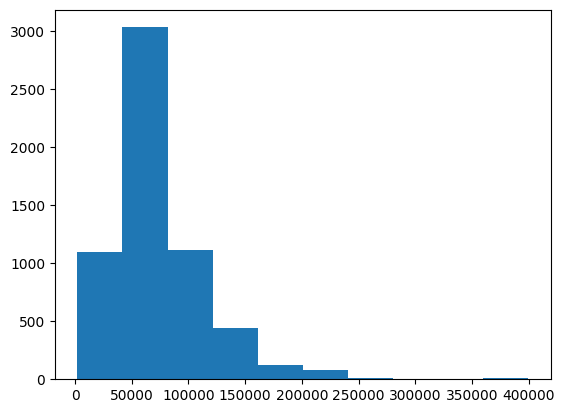

In [40]:
plt.hist(ds['MORTDUE'])

In [ ]:
ds['MORTDUE'] = np.log(ds['MORTDUE'])

Groups VALUE

In [42]:
ds['VALUE'].mean()

np.float64(101885.72743625086)

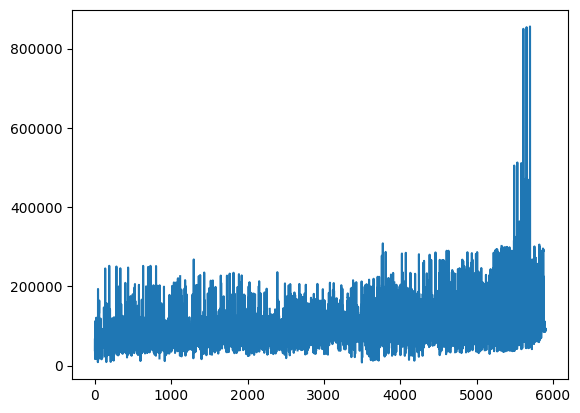

In [43]:
plt.plot(ds['VALUE'])

In [ ]:
ds['VALUE'] = ds['VALUE'].fillna(ds['VALUE'].mean())

(array([3.109e+03, 2.247e+03, 4.400e+02, 9.400e+01, 2.000e+00, 1.200e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00]),
 array([  8000. ,  92790.9, 177581.8, 262372.7, 347163.6, 431954.5,
        516745.4, 601536.3, 686327.2, 771118.1, 855909. ]),
 <BarContainer object of 10 artists>)

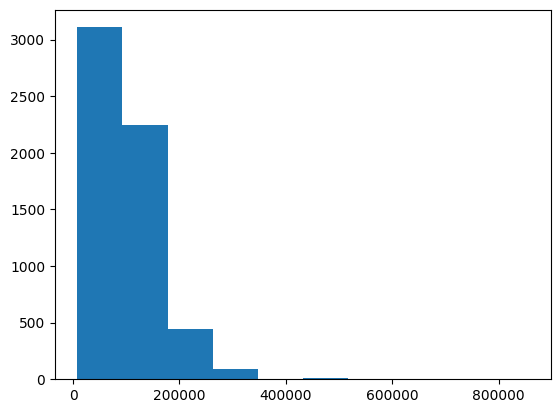

In [45]:
plt.hist(ds['VALUE'])

In [ ]:
ds['VALUE'] = np.log(ds['VALUE'])

Groups REASON

In [ ]:
ds['REASON'] = ds['REASON'].fillna('DebtCon')

In [48]:
ds['REASON'].unique()

array(['HomeImp', 'DebtCon'], dtype=object)

(array([1780.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4128.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

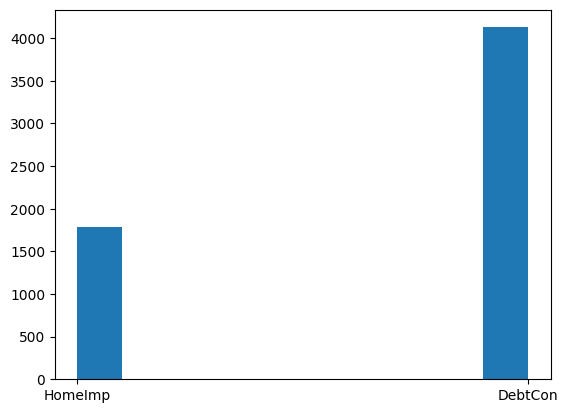

In [49]:
plt.hist(ds['REASON'])

In [50]:
ds['REASON'] = ds['REASON'].replace(['HomeImp', 'DebtCon'], [0, 1])

/tmp/ipython-input-1024886714.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds['REASON'] = ds['REASON'].replace(['HomeImp', 'DebtCon'], [0, 1])


Groups JOB

In [51]:
ds['JOB'].unique()

array(['Other', 'Office', 'Sales', nan, 'Mgr', 'ProfExe', 'Self'],
      dtype=object)

In [52]:
ds['JOB'].mode()[0]

'Other'

In [53]:
ds['JOB'] = ds['JOB'].fillna(ds['JOB'].mode()[0])

(array([2615.,    0.,  948.,    0.,  109.,    0.,  767.,    0., 1276.,
         193.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

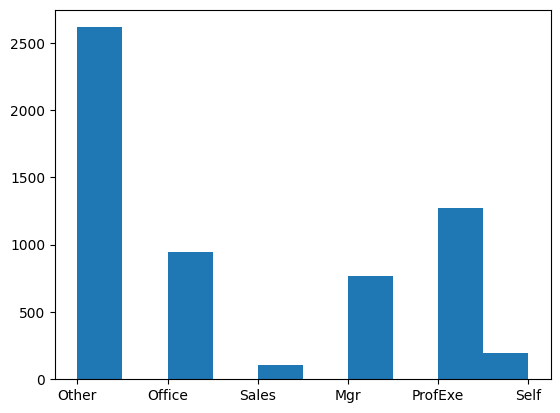

In [54]:
plt.hist(ds['JOB'])

In [55]:
ds['JOB'] = ds['JOB'].replace(['Other', 'Sales', 'Office', 'Mgr', 'ProfExe', 'Self'], [0, 1, 2, 3, 4, 5])

/tmp/ipython-input-284479343.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds['JOB'] = ds['JOB'].replace(['Other', 'Sales', 'Office', 'Mgr', 'ProfExe', 'Self'], [0, 1, 2, 3, 4, 5])


Groups YOJ

In [56]:
ds['YOJ'].mean()

np.float64(8.922268135904499)

In [57]:
ds['YOJ'] = ds['YOJ'].fillna(ds['YOJ'].mean())

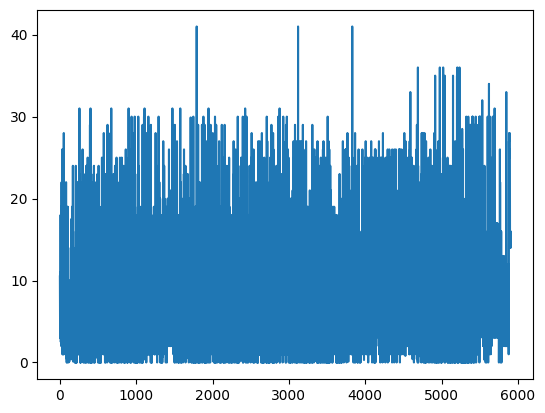

In [58]:
plt.plot(ds['YOJ'])

(array([1896., 1182., 1376.,  557.,  340.,  290.,  177.,   73.,   14.,
           3.]),
 array([ 0. ,  4.1,  8.2, 12.3, 16.4, 20.5, 24.6, 28.7, 32.8, 36.9, 41. ]),
 <BarContainer object of 10 artists>)

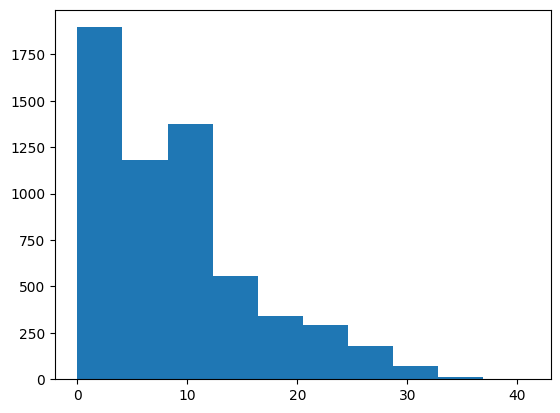

In [59]:
plt.hist(ds['YOJ'])

In [60]:
ds['YOJ'] = np.log(ds['YOJ']+1)

Groups DEROG

In [61]:
ds['DEROG'].std()

0.8460467770863016

In [62]:
ds['DEROG'] = ds['DEROG'].fillna(ds['DEROG'].std())

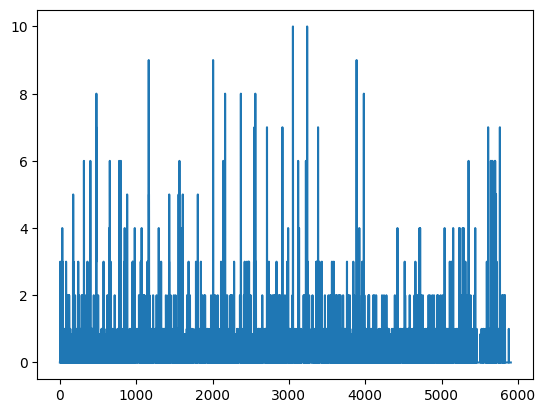

In [63]:
plt.plot(ds['DEROG'])

(array([5.183e+03, 4.350e+02, 1.600e+02, 5.800e+01, 2.300e+01, 1.500e+01,
        1.500e+01, 8.000e+00, 6.000e+00, 5.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

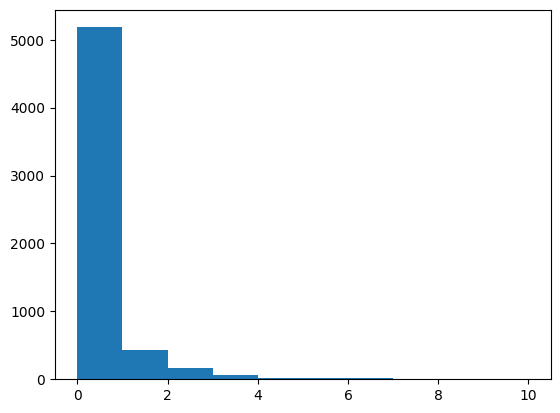

In [64]:
plt.hist(ds['DEROG'])

Groups DELINQ

In [65]:
ds['DELINQ'].std()

1.1272659176049586

In [66]:
ds['DELINQ'] = ds['DELINQ'].fillna(ds['DELINQ'].std())

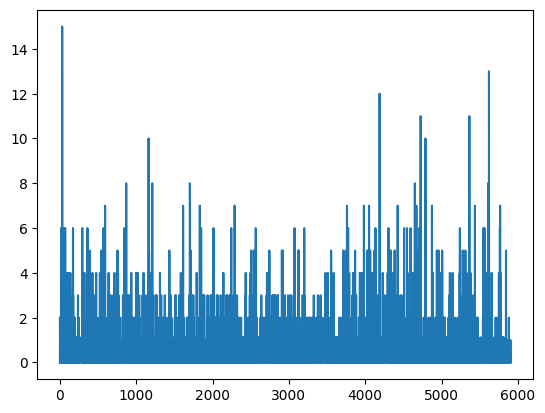

In [67]:
plt.plot(ds['DELINQ'])

(array([5.361e+03, 2.500e+02, 2.070e+02, 3.800e+01, 4.000e+01, 5.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

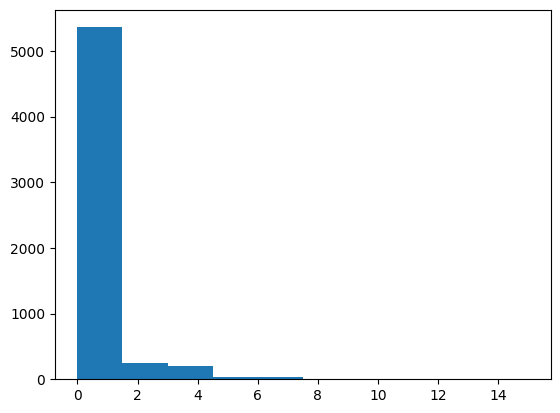

In [68]:
plt.hist(ds['DELINQ'])

Groups CLAGE

In [69]:
ds['CLAGE']

,CLAGE
0,94.366667
1,121.833333
2,149.466667
3,93.333333
4,101.466002
...,...
5903,221.808718
5904,208.692070
5905,212.279697
5906,213.892709


In [70]:
ds['CLAGE'].mean()

np.float64(179.76627518656602)

In [71]:
ds['CLAGE'] = ds['CLAGE'].fillna(ds['CLAGE'].mean())

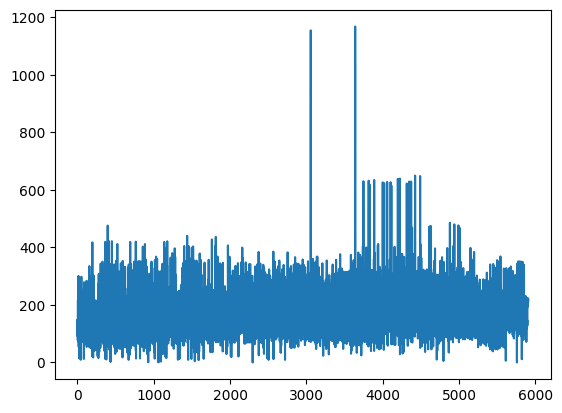

In [72]:
plt.plot(ds['CLAGE'])

(array([1.471e+03, 3.055e+03, 1.236e+03, 1.170e+02, 9.000e+00, 1.800e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([   0.        ,  116.82335609,  233.64671218,  350.47006827,
         467.29342436,  584.11678045,  700.94013654,  817.76349263,
         934.58684872, 1051.41020481, 1168.2335609 ]),
 <BarContainer object of 10 artists>)

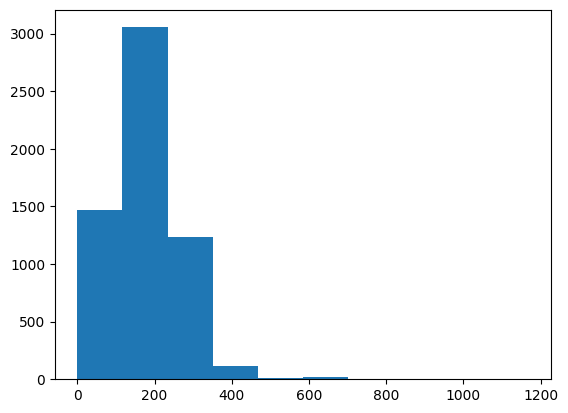

In [73]:
plt.hist(ds['CLAGE'])

Groups NINQ

In [74]:
ds['NINQ'].std()

1.728674971208009

In [75]:
ds['NINQ'] = ds['NINQ'].fillna(ds['NINQ'].std())

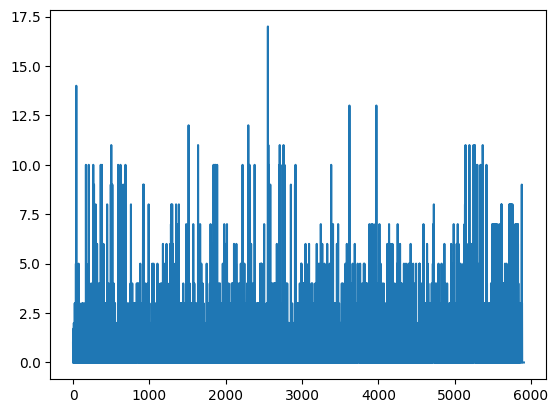

In [76]:
plt.plot(ds['NINQ'])

(array([3.87e+03, 1.63e+03, 2.31e+02, 5.60e+01, 6.60e+01, 3.90e+01,
        1.00e+01, 4.00e+00, 1.00e+00, 1.00e+00]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

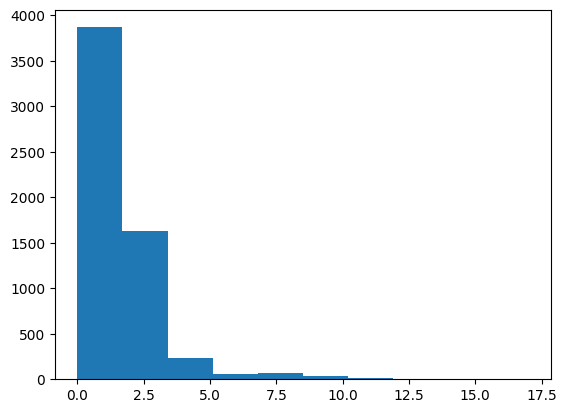

In [77]:
plt.hist(ds['NINQ'])

Groups DEBTINC

In [78]:
ds['DEBTINC'].mean()

np.float64(33.90638119541011)

In [79]:
ds['DEBTINC'] = ds['DEBTINC'].fillna(ds['DEBTINC'].mean())

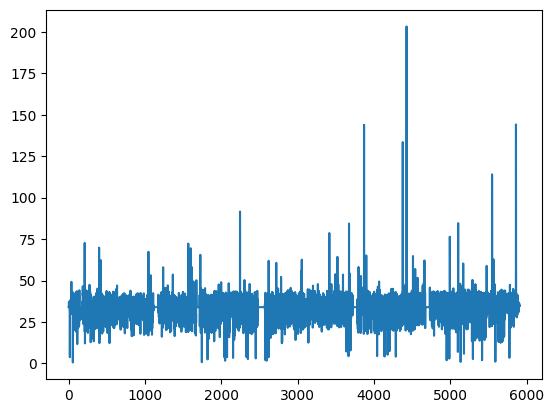

In [80]:
plt.plot(ds['DEBTINC'])

(array([2.34e+02, 5.12e+03, 5.29e+02, 1.70e+01, 3.00e+00, 1.00e+00,
        1.00e+00, 2.00e+00, 0.00e+00, 1.00e+00]),
 array([  0.52449922,  20.80326416,  41.08202911,  61.36079406,
         81.63955901, 101.91832395, 122.1970889 , 142.47585385,
        162.7546188 , 183.03338374, 203.31214869]),
 <BarContainer object of 10 artists>)

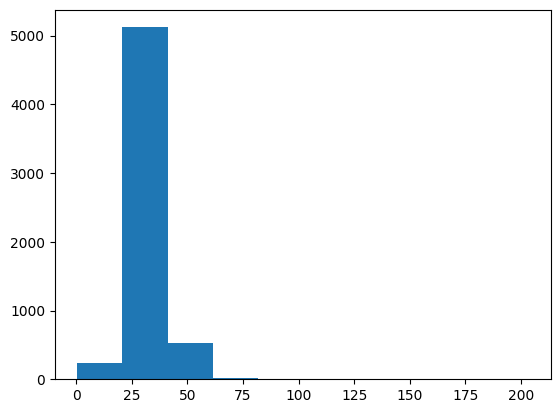

In [81]:
plt.hist(ds['DEBTINC'])

In [82]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5908 entries, 0 to 5907
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5908 non-null   int64  
 1   LOAN     5908 non-null   int64  
 2   MORTDUE  5908 non-null   float64
 3   VALUE    5908 non-null   float64
 4   REASON   5908 non-null   int64  
 5   JOB      5908 non-null   int64  
 6   YOJ      5908 non-null   float64
 7   DEROG    5908 non-null   float64
 8   DELINQ   5908 non-null   float64
 9   CLAGE    5908 non-null   float64
 10  NINQ     5908 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  5908 non-null   float64
dtypes: float64(9), int64(4)
memory usage: 600.2 KB


In [83]:
ds = ds.drop('CLNO', axis = 1)

In [84]:
ds

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,DEBTINC
0,1,1100,10.160453,10.571958,0,0,2.442347,0.0,0.0,94.366667,1.0,33.906381
1,1,1300,11.157007,11.133128,0,0,2.079442,0.0,2.0,121.833333,0.0,33.906381
2,1,1500,9.510445,9.723164,0,0,1.609438,0.0,0.0,149.466667,1.0,33.906381
3,0,1700,11.490680,11.626254,0,2,1.386294,0.0,0.0,93.333333,0.0,33.906381
4,1,1700,10.327054,10.604603,0,0,2.302585,0.0,0.0,101.466002,1.0,37.113614
...,...,...,...,...,...,...,...,...,...,...,...,...
5903,0,88900,10.955427,11.409618,1,0,2.833213,0.0,0.0,221.808718,0.0,36.112347
5904,0,89000,10.907350,11.439677,1,0,2.833213,0.0,0.0,208.692070,0.0,35.859971
5905,0,89200,10.897572,11.439537,1,0,2.772589,0.0,0.0,212.279697,0.0,35.556590
5906,0,89800,10.827151,11.428032,1,0,2.708050,0.0,0.0,213.892709,0.0,34.340882


# 🧪 Feature Engineering

## 🔄 Transformation / Scaling

In [85]:
y = ds['BAD']
X = ds.drop(['BAD'], axis = 1)

In [86]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

# Model Training

## ✅ Example Supervised Models (Classification)

# 1️⃣ Logistic Regression

In [88]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)



# 2️⃣ K-Nearest Neighbors (KNN)

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)


# 3️⃣ Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=4,        # limit depth for clarity
    random_state=0
)
dt.fit(X_train, y_train)

y_pred_dt1 = dt.predict(X_test)


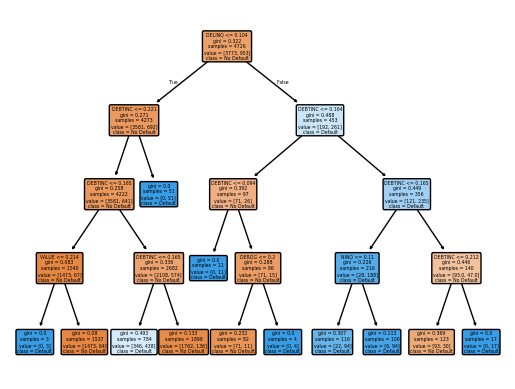

In [91]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# plt.figure(figsize=(20,10))
X = ds.drop(columns=['BAD'])   # pandas DataFrame
y = ds['BAD']

plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["No Default", "Default"],
    filled=True,
    rounded=True
)

plt.show()


# 4️⃣ Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


# 5️⃣ Support Vector Machine (SVM)

In [93]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)


# 📊 Simple Evaluation (for any model)

In [94]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
accuracy_score(y_test, y_pred_svm)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       947
           1       0.91      0.14      0.24       235

    accuracy                           0.83      1182
   macro avg       0.87      0.57      0.57      1182
weighted avg       0.84      0.83      0.77      1182



# 📌 Confusion Matrix

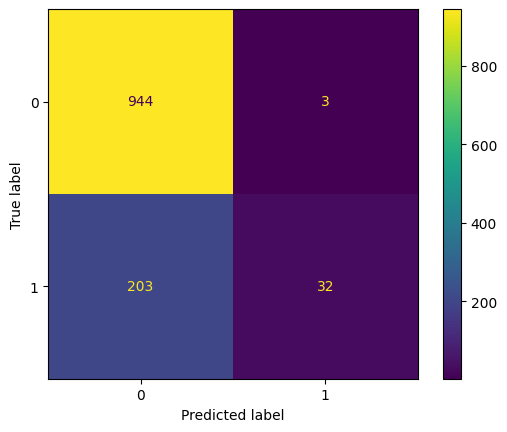

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_svm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# ✅ ROC-AUC

In [96]:
from sklearn.metrics import roc_auc_score

y_prob_svm = svm.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob_svm)

roc_auc


np.float64(0.7750971713586016)

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall   :", recall_score(y_test, y_pred_svm))
print("F1 Score :", f1_score(y_test, y_pred_svm))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_svm))


Accuracy : 0.8257191201353637
Precision: 0.9142857142857143
Recall   : 0.13617021276595745
F1 Score : 0.23703703703703705
ROC-AUC  : 0.7750971713586016


# 🔵 Unsupervised
*   DO NOT use BAD
*   Goal → discover hidden patterns / groups
*   Examples: K-Means, Hierarchical, PCA



🔄 Data Preparation

In [98]:
from sklearn.preprocessing import StandardScaler
#Remove target as unsupervised learning uses no target
X_unsup = ds.drop(columns=['BAD'])   # remove target

# Scale feautures
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsup)

# 1️⃣ K-Means Clustering

In [99]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

ds['Cluster'] = clusters


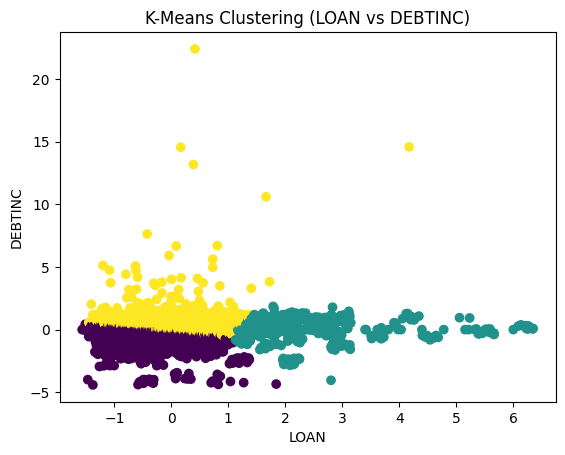

In [100]:
X_2d = ds[['LOAN', 'DEBTINC']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_2d_scaled = scaler.fit_transform(X_2d)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_2d_scaled)

plt.scatter(
    X_2d_scaled[:,0],
    X_2d_scaled[:,1],
    c=clusters
)
plt.xlabel("LOAN")
plt.ylabel("DEBTINC")
plt.title("K-Means Clustering (LOAN vs DEBTINC)")
plt.show()


# 3️⃣ PCA (Dimensionality Reduction)

In [101]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [102]:
ds.groupby('Cluster')[['LOAN','MORTDUE','VALUE','DEBTINC']].mean()

,LOAN,MORTDUE,VALUE,DEBTINC
Cluster,,,,
0,25690.028490,11.569625,11.901530,35.213071
1,17544.371345,10.801924,11.189862,33.619767
2,12140.578687,10.852804,11.211996,32.841410


🟣 Cluster 0 → high income, low debt → low risk

🟡 Cluster 1 → medium income, medium debt → medium risk

🟢 Cluster 2 → low income, high debt → high risk

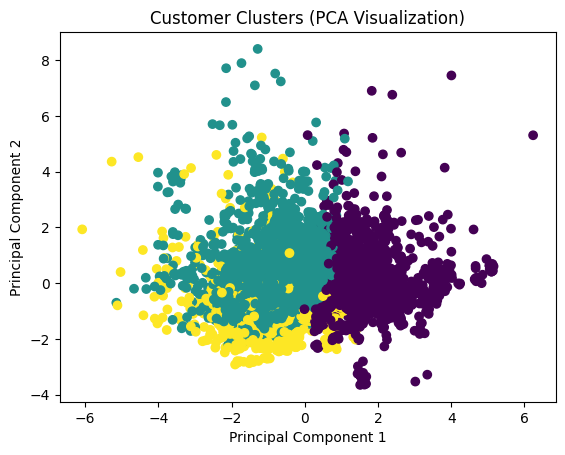

In [103]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
# plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=ds['Cluster'],
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Clusters (PCA Visualization)")
plt.show()
